# K-nearest Neighbors
<span style="font-size: 12px;">By: Marisol Hernandez</span>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import pandas as pd
import seaborn as sns
import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=UserWarning)

## 1. Introduction to K-nearest Neighbors
**K-Nearest Neighbors (KNN)** is a simple, intuitive, and versatile machine learning algorithm used for both **<span style="color: red;">classification</span>** and **<span style="color: red;">regression</span>** tasks. It is a non-parametric and lazy learning algorithm, meaning it makes no assumptions about the underlying data distribution and performs little to no training but classifies data points at the time of prediction.

In KNN, a data point is classified or predicted based on the most classes or values of the `k` (where `k` is an integer) nearest data points in the feature space.

### Applications
- **Handwriting Recognition**: KNN can be used to recognize handwritten digits by comparing the pixel values of an unknown digit to the known digits. For instance, to classify a new handwritten digit, KNN finds the `k` nearest known digits in the dataset and assigns the most common digit among them as the prediction.

- **Recommender Systems**: To suggest new movies to a user, KNN identifies the `k` most similar users based on their viewing history and recommends movies that those users have liked.

- **Customer Spending Prediction**: To predict how much money a potential customer might spend, KNN can look at the spending habits of the `k` most similar customers and average their spending to make the prediction.

## 2. How KNN Works

1. **Selection of the value of** `k`: A value is chosen for `k`, which represents **the number of nearest data points** to be considered for classifying or predicting the new data point. A small value may lead to a noisier model sensitive to outliers, while a large value may smooth the decision boundaries.

2. **Distance Calculation**: The algorithm calculates the distance between the data point that needs to be classified/predicted and all other points in the training set. Common distance metrics include Euclidean, Manhattan, and Minkowski distances.

3. **Identification of the** `k` **nearest neighbors**: It then selects the `k` nearest neighbors to the data point. `k` is a user-defined constant.

4. **Prediction** 
    - **Majority Vote for <span style="color: red;">Classification</span>**: For classification tasks, the data point is assigned to the class most common among its `k` nearest neighbors.

    - **Averaging for <span style="color: red;">Regression</span>**: For regression tasks, the value of the data point is the mean of the values of its `k` nearest neighbors. An alternative to using mean as a metric is median.

It is important to note that the performance of this model can be highly dependent on the value of `k` and the choice of distance metric. In addition, it can be computationally expensive for large data sets, since it must compute the distance to all training points for each prediction:

<p align="center">
  <img src="imgs/knn1.png" alt="Alt text" width="600" height="350">
</p>

The value of `k` determines the number of nearest neighbors used to influence the prediction or classification outcome:

<p align="center">
  <img src="imgs/knn2.png" alt="Alt text" width="600" height="350">
</p>

As can be seen in the case of the figure, the value selected for `k` can bias a particular prediction towards the opposite or another one with slight changes. When `k=3`, the predicted class of the unknown datapoint would be a green triangle, <svg width="15" height="15" style="vertical-align: middle;">
  <polygon points="7.5,2.5 2.5,12.5 12.5,12.5" style="fill:green;stroke:black;stroke-width:1" />
</svg>. Whereas when `k=5`, the predicted class would be a blue square, <span style="display: inline-block; width: 15px; height: 15px; background-color: blue; vertical-align: middle;"></span>.

## 3. Distance Metrics
Distance metrics are functions used to measure the proximity or similarity between two data points in a KNN model. There are a large number of proposals, but the best known are the following:

### 3.1 Euclidean Distance
- **Definition**: Measures the straight-line distance between two points in Euclidean space. Suitable for numerical data.

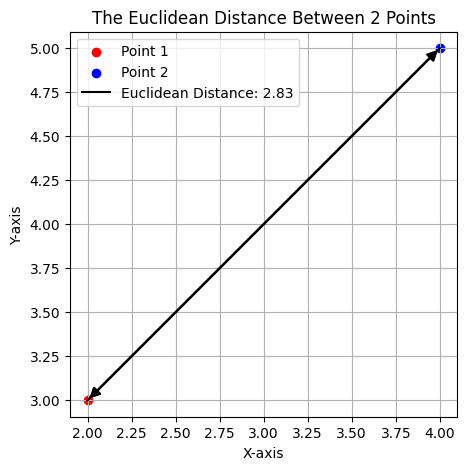

In [3]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Euclidean distance
euclidean_dist = distance.euclidean(point1, point2)

# Plot the points
plt.figure(figsize=(5, 5))
plt.scatter(point1[0], point1[1], color='red', label='Point 1')
plt.scatter(point2[0], point2[1], color='blue', label='Point 2')
plt.title('The Euclidean Distance Between 2 Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot a line between the points to show Euclidean distance
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], linestyle='-', color='black', label=f'Euclidean Distance: {euclidean_dist:.2f}')

# Add arrows on both ends of the line
arrowprops = dict(arrowstyle='<|-|>', color='black', linewidth=1.5, mutation_scale=15)
plt.annotate('', xy=point1, xytext=point2, arrowprops=arrowprops)
plt.annotate('', xy=point2, xytext=point1, arrowprops=arrowprops)

# Prepare the legend 
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling

# Show the plot
plt.show()


- **Formula**: For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$, the Euclidean distance $d$ is calculated as:

$$d(p, q) = \sqrt{\sum^n_{i=1}(p_i-q_i)^2}$$

Let's use the formula to validate the Euclidean distance between the two data points, $p = (2, 3)$ and $q = (4, 5)$:

$$d(p, q) = \sqrt{\sum^2_{i=1}(p_i-q_i)^2}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= \sqrt{(p_1-q_1)^2+(p_2-q_2)^2}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= \sqrt{(2-4)^2+(3-5)^2}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= \sqrt{2^2+(-2)^2}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= \sqrt{4+4}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= \sqrt{8}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~\approx 2.83$$

Using the Python `distance.euclidean` import,

In [4]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Euclidean distance
euclidean_dist = distance.euclidean(point1, point2)
euclidean_dist

2.8284271247461903

### 3.2 Manhattan Distance
- **Definition**: Also known as city block distance or taxicab distance, measures the sum of absolute differences between corresponding Cartesian coordinates of points. Suitable for numerical data as well.

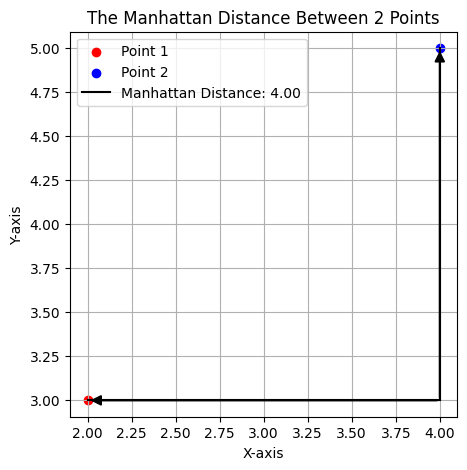

In [5]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Manhattan distance
manhattan_dist = distance.cityblock(point1, point2)

# Plot the points
plt.figure(figsize=(5, 5))
plt.scatter(point1[0], point1[1], color='red', label='Point 1')
plt.scatter(point2[0], point2[1], color='blue', label='Point 2')
plt.title('The Manhattan Distance Between 2 Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot a line between the points to show Manhattan distance
plt.plot([point1[0], point2[0]], [point1[1], point1[1]], linestyle='-', color='black')
plt.plot([point2[0], point2[0]], [point1[1], point2[1]], linestyle='-', color='black', label=f'Manhattan Distance: {manhattan_dist:.2f}')

# Calculate midpoint for annotation
midpoint_x = (point1[0] + point2[0]) / 2
midpoint_y = (point1[1] + point2[1]) / 2

# Add arrows on both ends of the line
arrowprops = dict(arrowstyle='<|-', color='black', linewidth=1.5, mutation_scale=15)
plt.annotate('', xy=(point2[0], point1[1]), xytext=(point2[0], point2[1]), arrowprops=arrowprops)
arrowprops = dict(arrowstyle='-|>', color='black', linewidth=1.5, mutation_scale=15)
plt.annotate('', xy=(point1[0], point1[1]), xytext=(point2[0], point1[1]), arrowprops=arrowprops)

# Prepare the legend
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling

# Show the plot
plt.show()


- **Formula**: For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$, the Manhattan distance $d$ is calculated as:

$$d(p, q) = \sum^n_{i=1}|p_i-q_i|$$

Let's use the formula to validate the Euclidean distance between the two data points, $p = (2, 3)$ and $q = (4, 5)$:

$$d(p, q) = \sum^2_{i=1}|p_i-q_i|$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= |p_1-q_1|+|p_2-q_2|$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= |2-4|+|3-5|$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= 2+2$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= 4$$

Using the Python `distance.cityblock` import,

In [6]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Manhattan distance
manhattan_dist = distance.cityblock(point1, point2)
manhattan_dist

4

### 3.3 Minkowski Distance
- **Definition**: A generalized form that includes both Euclidean and Manhattan distances as special cases. It is parameterized by a parameter $p$.

- **Formula**: For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$, the Minkowski distance $d$ is calculated as:

$$d(p, q) = (\sum^n_{i=1}|p_i-q_i|^p)^{\frac{1}{p}}$$

where,

- When $p = 1$, it reduces to Manhattan distance.

- When $p = 2$, it reduces to Euclidean distance.

<p align="center">
  <img src="imgs/knn3.jpg" alt="Alt text" width="600" height="350">
</p>

Let's use the formula to validate the Euclidean distance between the two data points, $p = (2, 3)$ and $q = (4, 5)$ for parameter $p=1.5$:

$$d(p, q) = (\sum^n_{i=1}|p_i-q_i|^{1.5})^{\frac{1}{1.5}}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= (|p_1-q_1|^{1.5}+|p_2-q_2|^{1.5})^{\frac{1}{1.5}}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= (|2-4|^{1.5}+|3-5|^{1.5})^{\frac{1}{1.5}}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= (2^{1.5}+2^{1.5})^{\frac{1}{1.5}}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~\approx 5.66^{\frac{1}{1.5}} $$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~\approx 3.17 $$

Using the Python `distance.minkowski` import,

In [7]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Minkowski distance with p=1.5 (you can change the value of p)
p = 1.5
minkowski_dist = distance.minkowski(point1, point2, p)
minkowski_dist

3.1748021039363987

### 3.4 Chebyshev Distance
- **Definition**: Measures the maximum absolute difference between the coordinates of two points.

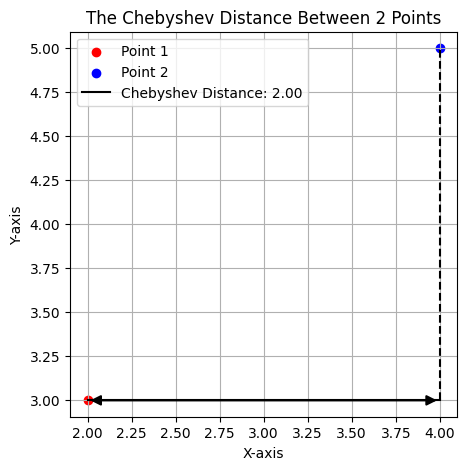

In [8]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Chebyshev distance
chebyshev_dist = distance.chebyshev(point1, point2)

# Plot the points
plt.figure(figsize=(5, 5))
plt.scatter(point1[0], point1[1], color='red', label='Point 1')
plt.scatter(point2[0], point2[1], color='blue', label='Point 2')
plt.title('The Chebyshev Distance Between 2 Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot a line between the points to show Chebyshev distance
plt.plot([point1[0], point2[0]], [point1[1], point1[1]], linestyle='-', color='black', label=f'Chebyshev Distance: {chebyshev_dist:.2f}')
plt.plot([point2[0], point2[0]], [point1[1], point2[1]], linestyle='--', color='black')

# Calculate midpoint for annotation
midpoint_x = (point1[0] + point2[0]) / 2
midpoint_y = (point1[1] + point2[1]) / 2

# Add arrows on both ends of the line
arrowprops = dict(arrowstyle='<|-|>', color='black', linewidth=1.5, mutation_scale=15)
plt.annotate('', xy=(point1[0], point1[1]), xytext=(point2[0], point1[1]), arrowprops=arrowprops)

# Prepare the legend
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling

# Show the plot
plt.show()

- **Formula**: For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$, the Chebyshev distance $d$ is calculated as:

$$d(p, q) = \text{max}(|p_i-q_i|)$$

Let's use the formula to validate the Euclidean distance between the two data points, $p = (2, 3)$ and $q = (4, 5)$

$$d(p, q) = \text{max}(|p_i-q_i|)$$

$$= \text{max}(|p_1-q_1|, |p_2-q_2|)$$

$$= \text{max}(|2-4|, |3-5|)$$

$$= \text{max}(|2|, |-2|)$$

$$= \text{max}(2, 2)$$

$$= 2$$

Using the Python `distance.chebyshev` import,

In [9]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Chebyshev distance
chebyshev_dist = distance.chebyshev(point1, point2)
chebyshev_dist

2

### 3.5 Cosine Similarity (Distance)
- **Definition**: Measures the cosine of the angle between two vectors.

<p align="center">
  <img src="imgs/knn4.png" alt="Alt text" width="250" height="250">
</p>

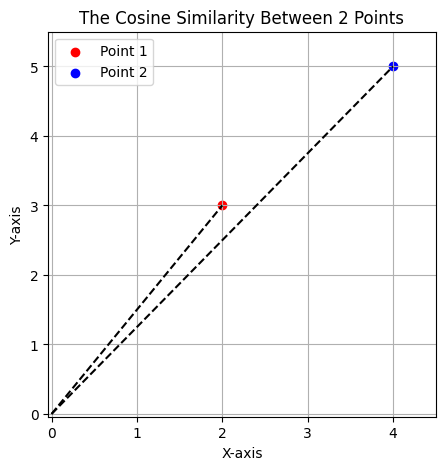

In [10]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Plot the points
plt.figure(figsize=(5, 5))
plt.scatter(point1[0], point1[1], color='red', label='Point 1')
plt.scatter(point2[0], point2[1], color='blue', label='Point 2')
plt.title('The Cosine Similarity Between 2 Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim((-0.04, 4.5))
plt.ylim((-0.04, 5.5))

# Plot vectors from origin to the points
origin = np.array([0, 0])
plt.plot([origin[0], point1[0]], [origin[1], point1[1]], linestyle='--', color='black')
plt.plot([origin[0], point2[0]], [origin[1], point2[1]], linestyle='--', color='black')

# Prepare the legend
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

- **Formula**: For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$, the Cosine Similarity, $\text{similarity}$, is calculated as:

$$\text{similarity}(p, q) = \frac{p\cdot q}{||p||~||q||}$$

$$= \frac{\sum_{i=1}^n{p_iq_i}}{\sqrt{\sum_{i=1}^n{p_i^2}}\sqrt{\sum_{i=1}^n{q_i^2}}}$$

where $p\cdot q$ is the dot product and $||p||$ and $||q||$ are the norms of $p$ and $q$ respectively.

Let's use the formula to validate the Euclidean distance between the two data points, $p = (2, 3)$ and $q = (4, 5)$

$$\text{similarity}(p, q) = \frac{p\cdot q}{||p||~||q||}$$

$$= \frac{\sum_{i=1}^2{p_iq_i}}{\sqrt{\sum_{i=1}^2{p_i^2}}\sqrt{\sum_{i=1}^2{q_i^2}}}$$

$$= \frac{(p_1 \times q_1)+(p_1 \times q_1)}{\sqrt{p_1^2+p_2^2}\sqrt{q_1^2+q_2^2}}$$

$$= \frac{(2\times4)+(3\times5)}{\sqrt{2^2+3^2}\sqrt{4^2+5^2}}$$

$$= \frac{8+15}{\sqrt{4+9}\sqrt{16+25}}$$

$$= \frac{23}{\sqrt{13}\sqrt{41}}$$

$$\approx 0.9962$$

Using the Python `sklearn.metrics.pairwise.cosine_similarity` import,

In [11]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate cosine similarity
cosine_sim = cosine_similarity(point1.reshape(1,-1), point2.reshape(1,-1))[0][0]
cosine_sim

0.9962405881956831

### 3.6 Hamming Distance
- **Definition**: Calculates the number of positions at which corresponding symbols differ between two strings of equal length.

<p align="center">
  <img src="imgs/knn5.png" alt="Alt text" width="250" height="250">
</p>

- **Formula**: For strings $p$ and $q$ of length $n$ (same length), Hamming distance $d$ is given by,

$$d(p, q) = \sum^n_{i=1}\delta(p_i, q_i)$$

where $\delta(p_i, q_i)$ equals 0 if $p_i=q_i$ and 1 otherwise.

In [12]:
# Calculate Hamming distance between "Golang" and "Gopher"
str1 = "Golang"
str2 = "Gopher"
hamming_dist = distance.hamming(list(str1), list(str2)) * len(str1)  # Multiply by length to get actual distance
hamming_dist

4.0

### 3.7 Distance Metrics Comparison
<p align="center">
  <img src="imgs/knn6.png" alt="Alt text" width="650" height="400">
</p>

## 4. KNN for Classification

### Step 1: Read the Dataset
We'll use the following dataset to use KNN to classify new data points as *Pear* or *Grape* based on their `k` nearest neighbors.

In [13]:
# Number of samples for each class
num_samples = 50

# Generating random data for Pear with error
np.random.seed(0)
pear_diameter = np.random.uniform(4, 8, num_samples)
pear_roundness = np.random.uniform(0, 0.6, num_samples) 

# Generating random data for Grape with error
np.random.seed(1)
grape_diameter = np.random.uniform(2, 6, num_samples) 
grape_roundness = np.random.uniform(0.3, 1, num_samples) 

# Creating the dataset
data = {
    'Fruit': ['Pear'] * num_samples + ['Grape'] * num_samples,
    'Diameter (cm)': np.concatenate((pear_diameter, grape_diameter)),
    'Roundness Score': np.concatenate((pear_roundness, grape_roundness))
}

# Creating a pandas DataFrame
df = pd.DataFrame(data)
df

,Fruit,Diameter (cm),Roundness Score
0,Pear,6.195254,0.342118
1,Pear,6.860757,0.263161
2,Pear,6.411054,0.593024
3,Pear,6.179533,0.061227
4,Pear,5.694619,0.125326
...,...,...,...
95,Grape,3.791574,0.465919
96,Grape,5.634382,0.932366
97,Grape,3.174457,0.701576
98,Grape,3.151101,0.302009


### Step 2: Visualize the Dataset
We can plot our two features in a scatterplot.

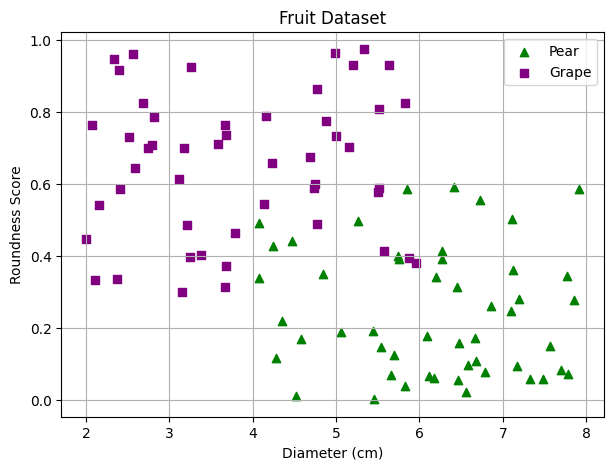

In [14]:
# Separate data for Pear and Grape
pear_data = df[df['Fruit'] == 'Pear']
grape_data = df[df['Fruit'] == 'Grape']

# Plotting the data
plt.figure(figsize=(7, 5))

plt.scatter(pear_data['Diameter (cm)'], pear_data['Roundness Score'], marker='^', color='green', label='Pear')
plt.scatter(grape_data['Diameter (cm)'], grape_data['Roundness Score'], marker='s', color='purple', label='Grape')

plt.title('Fruit Dataset')
plt.xlabel('Diameter (cm)')
plt.ylabel('Roundness Score')
plt.legend()

plt.grid(True)
plt.show()

### Step 3: train/test Split
When training any machine learning model, it is important to split the data into training and test data. The training data is used to fit the model. The test data is used to evaluate the performance of the model.

In [15]:
# Split the data into features (X) and target (y)
X = df.drop('Fruit', axis=1)
y = df['Fruit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 2)
y_train shape: (80,)
X_test shape: (20, 2)
y_test shape: (20,)


In [16]:
# Inspect X_train
X_train

,Diameter (cm),Roundness Score
65,4.681870,0.675127
2,6.411054,0.593024
10,7.166900,0.095382
16,4.080874,0.492596
18,7.112627,0.502767
...,...,...
67,4.234759,0.660422
86,4.746004,0.599664
35,6.470542,0.159234
71,5.873046,0.396232


### Step 4: Normalize the Data
When training a KNN classifier, it's essential to normalize the features. If the features are not on the same scale, those with larger magnitudes can dominate the distance and affect the result of the algorithm.

For example, if we have two characteristics: age (with values between 0 and 100) and annual income (with values between 0 and 100,000), the difference in scale between the two variables could cause annual income to have a disproportionate impact on the distance by ignoring the importance of age. 

Standardizing the data helps all characteristics contribute equally to the distance, which can improve the performance of the KNN algorithm. 

The choice between normalization and Min-Max standardization will depend on the behavior of the variables and how they affect model performance. If we have features with different scales and ranges, Min-Max is the best alternative. If, on the other hand, they have the same or similar scale, normalization is the most appropriate.

Lastly, we should normalize the data **<span style="color: red;">after</span>** splitting it into training and test sets. This is to prevent ‘data leakage’ as the normalization would give the model additional information about the test set if we normalized all the data at once.

In [17]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We first call `.fit_transform()` on the training data, which fits our scaler to the mean and standard deviation of the training data. We can then apply this to the test data by calling `.transform()`, which uses the previously learned values.

We can inspect how this transformed our training data below,

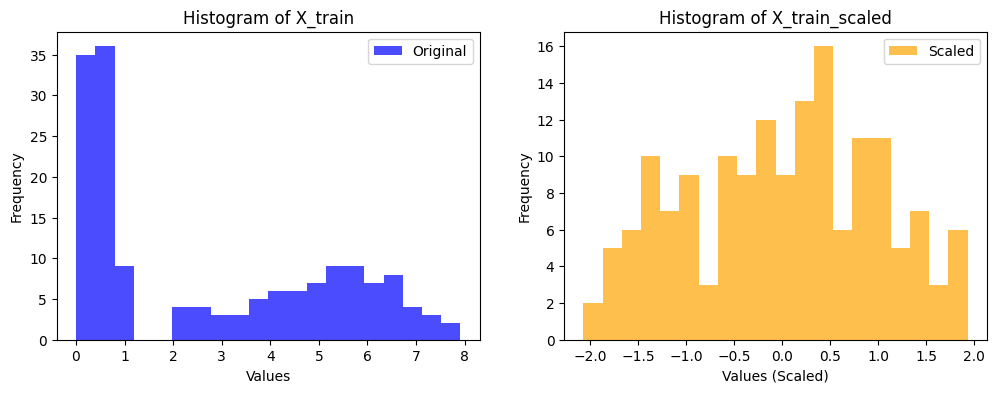

In [18]:
# Plot histograms of X_train and X_train_scaled
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(X_train.values.flatten(), bins=20, alpha=0.7, color='blue', label='Original')
plt.title('Histogram of X_train')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled.flatten(), bins=20, alpha=0.7, color='orange', label='Scaled')
plt.title('Histogram of X_train_scaled')
plt.xlabel('Values (Scaled)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Step 5: Model initialization and training
We can now train the model. For this, we’ll use a fixed value of 3 for `k`, but we can later optimize this. Note that the model is trained with `X_train_scaled`.

In [19]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Step 6: Model Evaluation
The model is trained! Now we can use it to make predictions on our test data (`X_test_scaled`), which will be used to evaluate the model.

In [20]:
# Predict the labels for the test set
y_pred = model.predict(X_test_scaled)

test_df = X_test.copy()
test_df["Fruit"] = y_test
test_df["Predictions"] = y_pred
test_df.head()

,Diameter (cm),Roundness Score,Fruit,Predictions
7,7.567092,0.151975,Pear,Pear
27,7.778676,0.072118,Pear,Pear
13,7.702387,0.082910,Pear,Pear
1,6.860757,0.263161,Pear,Pear
57,3.382243,0.402710,Grape,Grape


Lets evaluate its performance using accuracy, confusion matrix, and classification report.

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(cr)

Accuracy: 0.95

Confusion Matrix:
[[10  0]
 [ 1  9]]

Classification Report:
              precision    recall  f1-score   support

       Grape       0.91      1.00      0.95        10
        Pear       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



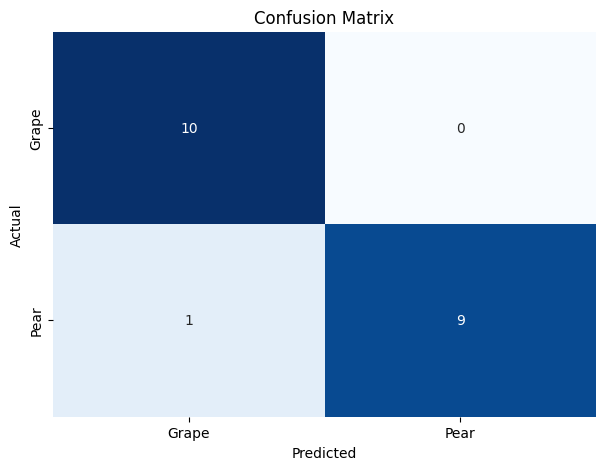

In [22]:
# Plot confusion matrix
labels = ["Grape", "Pear"]
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Step 7: Making a Prediction on a New Data Point
Let's say only have the Diameter (cm) and Roundness Score for an unknown fruit. Let's use our KNN model to predict whether it's a Grape or Pear based on its `k=3` nearest neighbors.

In [23]:
# Define a new data point
new_data = {
    'Diameter (cm)': [6.1],   # Example diameter value
    'Roundness Score': [0.4]  # Example roundness score value
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)
new_df

,Diameter (cm),Roundness Score
0,6.1,0.4


If your original training data (`X_train`) was scaled using `StandardScaler` (or any other scaler), any new data point that you want to use for prediction should also be scaled using the same scaler instance. This ensures that the new data point is in the same scale as the data the model was trained on.

In [24]:
# Scale the new data point
new_data_scaled = scaler.transform(new_df)
new_data_scaled

array([[ 0.70572975, -0.20419922]])

Let's plot this scaled new data point along with the `X_train_scaled` data points. We can find the 3 nearest neighbors of this new scaled data point (derived from the model) and determine its classification based on the majority class of its neighbors.

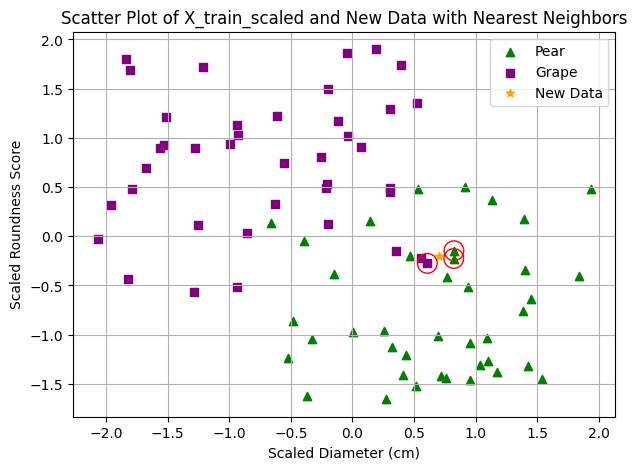

In [25]:
# Gather scaled X_train data
X_train_scaled_df = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_train_scaled_df["Fruit"] = y_train.values

# Separate scaled data for Pear and Grape
pear_data = X_train_scaled_df[X_train_scaled_df['Fruit'] == 'Pear']
grape_data = X_train_scaled_df[X_train_scaled_df['Fruit'] == 'Grape']

# Find the indices of the 3 nearest neighbors of new_data_scaled
num_neighbors = 3
_, neighbor_indices = model.kneighbors(new_data_scaled, n_neighbors=num_neighbors)

# Plotting the data
plt.figure(figsize=(7, 5))

# Scatter plot of Pear and Grape data
plt.scatter(pear_data['Diameter (cm)'], pear_data['Roundness Score'], marker='^', color='green', label='Pear')
plt.scatter(grape_data['Diameter (cm)'], grape_data['Roundness Score'], marker='s', color='purple', label='Grape')

# Scatter plot of new_data_scaled
plt.scatter(new_data_scaled[:, 0], new_data_scaled[:, 1], color='orange', marker='*', label='New Data')

# Highlight the 3 nearest neighbors with a red circle
for idx in neighbor_indices.flatten():
    plt.scatter(X_train_scaled[idx, 0], X_train_scaled[idx, 1], s=200, facecolors='none', edgecolors='red')

plt.title('Scatter Plot of X_train_scaled and New Data with Nearest Neighbors')
plt.xlabel('Scaled Diameter (cm)')
plt.ylabel('Scaled Roundness Score')
plt.legend()

plt.grid(True)
plt.show()


Let's validate this by making the prediction from our model,

In [26]:
# Predict using the trained model
new_pred = model.predict(new_data_scaled)

# Display the predictions
print("Predicted Fruit Class:")
print(new_pred[0])

Predicted Fruit Class:
Pear


## 5. KNN for Regression
### Step 1: Read the Dataset
Let's consider a scenario where you have two features that might be related to Customer Lifetime Value (CLV):

1. **Number of Purchases** (in the past year)

2. **Average Purchase Value** (in dollars)

if we wanted to predict the Customer Lifetime Value (CLV) for a customer, we could do it based on the `k` most similar customers to them and average their CLVs.

In [27]:
# Example data
np.random.seed(42)  # For reproducibility

number_of_purchases = np.random.randint(1, 100, size=50)
average_purchase_value = np.random.randint(50, 500, size=50)
customer_lifetime_value = number_of_purchases * average_purchase_value * np.random.uniform(0.8, 1.2, size=50)

df = pd.DataFrame({
    "Number of Purchases": number_of_purchases,
    "Average Purchase Value": average_purchase_value,
    "Customer Lifetime Value": customer_lifetime_value
})
df.head()

,Number of Purchases,Average Purchase Value,Customer Lifetime Value
0,52,437,23512.533395
1,93,138,15222.434645
2,15,365,5709.405002
3,72,63,4129.572916
4,61,291,16304.460400


### Step 2: Visualize the Dataset
We can plot our two features in a scatterplot. The size of each data point is scaled by their `Customer Lifetime Value`. Larger data points indicate customers with larger `Customer Lifetime Value` and vice versa.

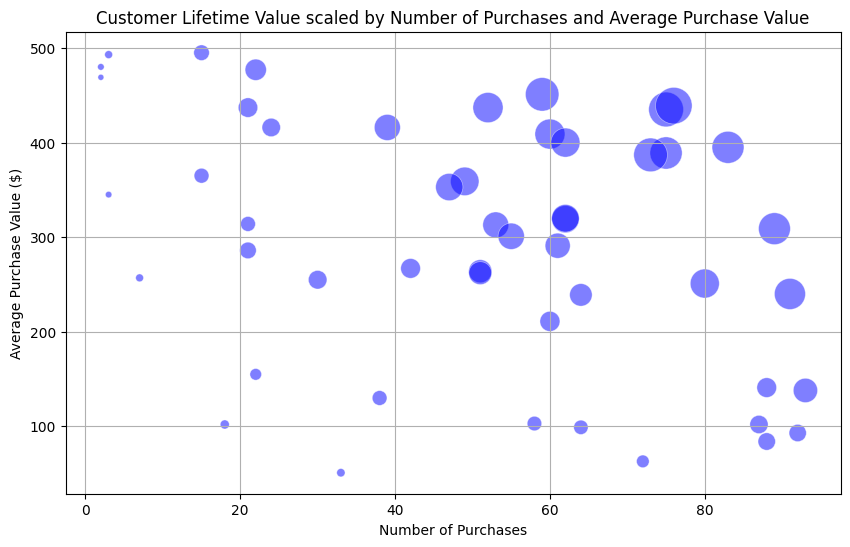

In [28]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(
    df["Number of Purchases"], 
    df["Average Purchase Value"], 
    s=df["Customer Lifetime Value"] / 50,  # Scaling the size of the points
    alpha=0.5, 
    c='blue', 
    edgecolors='w', 
    linewidth=0.5
)

plt.xlabel('Number of Purchases')
plt.ylabel('Average Purchase Value ($)')
plt.title('Customer Lifetime Value scaled by Number of Purchases and Average Purchase Value')
plt.grid(True)
plt.show()

### Step 3: train/test Split
When training any machine learning model, it is important to split the data into training and test data. The training data is used to fit the model. The test data is used to evaluate the performance of the model.

In [29]:
# Split the data into features (X) and target (y)
X = df.drop('Customer Lifetime Value', axis=1)
y = df['Customer Lifetime Value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40, 2)
y_train shape: (40,)
X_test shape: (10, 2)
y_test shape: (10,)


In [30]:
# Inspect X_train
X_train.head()

,Number of Purchases,Average Purchase Value
12,3,493
4,61,291
37,62,400
8,75,435
3,72,63


### Step 4: Normalize the Data
In this example, we'll scale `X_train` and `X_test` using `MinMaxScaler()`,

In [31]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

The scaled `X_train_scaled` and `X_test_scaled` now fall between a range of 0 and 1.

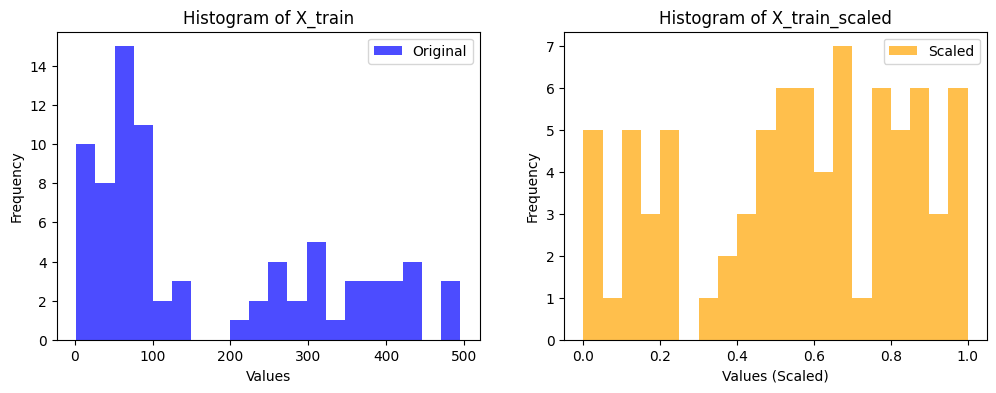

In [32]:
# Plot histograms of X_train and X_train_scaled
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(X_train.values.flatten(), bins=20, alpha=0.7, color='blue', label='Original')
plt.title('Histogram of X_train')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled.flatten(), bins=20, alpha=0.7, color='orange', label='Scaled')
plt.title('Histogram of X_train_scaled')
plt.xlabel('Values (Scaled)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Step 5: Model initialization and training
We can now train the model. For this, we’ll use a fixed value of 3 for `k`, but we can later optimize this. Note that the model is trained with `X_train_scaled` and that we use `KNeighborsRegressor` as opposed to `KNeighborsClassfier`.

In [33]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

### Step 6: Model Evaluation
The model is trained! Now we can use it to make predictions on our test data (`X_test_scaled`), which will be used to evaluate the model.

In [34]:
# Predict the labels for the test set
y_pred = model.predict(X_test_scaled)

test_df = X_test.copy()
test_df["Customer Lifetime Value"] = y_test
test_df["Predictions"] = y_pred
test_df.head()

,Number of Purchases,Average Purchase Value,Customer Lifetime Value,Predictions
13,22,477,11712.040849,8282.475078
39,62,320,19644.538091,17817.415619
30,59,451,28969.000331,22875.179949
45,7,257,1585.322857,4619.749430
17,30,255,8919.776607,7603.584484


Since this an example of a regression task, we should use metrics suited for regression to evaluate our model like MSE.

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7589705.066851619


### Step 7: Making a Prediction on a New Data Point

In [36]:
# Define a new data point
new_data = {
    'Number of Purchases': [60],  
    'Average Purchase Value': [250]  
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)
new_df

,Number of Purchases,Average Purchase Value
0,60,250


If your original training data (`X_train`) was scaled using `MinMaxScaler` (or any other scaler), any new data point that you want to use for prediction should also be scaled using the same scaler instance. This ensures that the new data point is in the same scale as the data the model was trained on.

In [37]:
# Scale the new data point
new_data_scaled = scaler.transform(new_df)
new_data_scaled

array([[0.63736264, 0.4481982 ]])

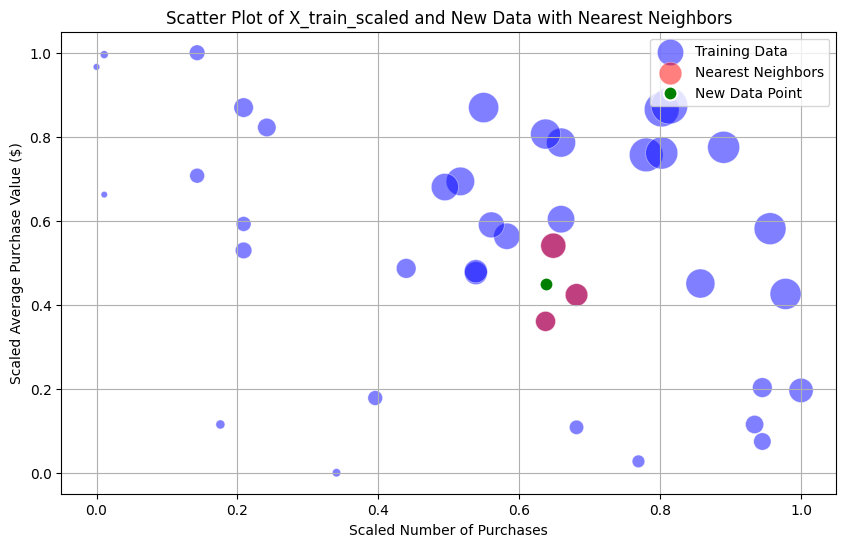

In [38]:
# Gather scaled X_train data
X_train_scaled_df = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_train_scaled_df["Customer Lifetime Value"] = y_train.values

# Find the indices of the 3 nearest neighbors of new_data_scaled
num_neighbors = 3
_, neighbor_indices = model.kneighbors(new_data_scaled, n_neighbors=num_neighbors)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(
    X_train_scaled_df["Number of Purchases"], 
    X_train_scaled_df["Average Purchase Value"], 
    s=X_train_scaled_df["Customer Lifetime Value"] / 50,  # Scaling the size of the points
    alpha=0.5, 
    c='blue', 
    edgecolors='w', 
    linewidth=0.5,
    label='Training Data'
)

# Highlight the nearest neighbors in red
plt.scatter(
    X_train_scaled_df.iloc[neighbor_indices[0]]["Number of Purchases"], 
    X_train_scaled_df.iloc[neighbor_indices[0]]["Average Purchase Value"], 
    s=X_train_scaled_df.iloc[neighbor_indices[0]]["Customer Lifetime Value"] / 50, 
    alpha=0.5, 
    c='red', 
    edgecolors='w', 
    linewidth=0.5,
    label='Nearest Neighbors'
)

# Plot the new data point
plt.scatter(
    new_data_scaled[0, 0], 
    new_data_scaled[0, 1], 
    s=100,  # Fixed size for visibility
    alpha=1, 
    c='green', 
    edgecolors='w', 
    linewidth=1.5,
    label='New Data Point'
)

plt.xlabel('Scaled Number of Purchases')
plt.ylabel('Scaled Average Purchase Value ($)')
plt.title('Scatter Plot of X_train_scaled and New Data with Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

We can retrieve the raw data for the 3 nearest neighbors,

In [39]:
X_train_scaled_df.iloc[neighbor_indices[0]]

,Number of Purchases,Average Purchase Value,Customer Lifetime Value
36,0.681319,0.423423,13089.285571
18,0.637363,0.360360,10332.755697
1,0.648352,0.540541,16304.460400


Our model we'll then predict the average `Customer Lifetime Value` of these neighbors as the predicted `Customer Lifetime Value` for our new data point. Written out,

$$ \text{Prediction} = \frac{1}{k}\sum_{i=1}^ky_i$$

$$ = \frac{1}{3}\sum_{i=1}^3y_i$$

$$ = \frac{1}{3}(y_1 + y_2 + y_3)$$

$$ = \frac{1}{3}(13089.285571 + 10332.755697 + 16304.460400)$$

$$ \approx 13242.167$$

In [40]:
np.mean(X_train_scaled_df.iloc[neighbor_indices[0]]['Customer Lifetime Value'])

13242.167222653597

In [41]:
# Predict using the trained model
new_pred = model.predict(new_data_scaled)

# Display the predictions
print("Predicted Customer Lifetime Value:")
print(new_pred[0])

Predicted Customer Lifetime Value:
13242.167222653597


## 5. Model Hyperparameters
We can easily build a KNN model in Python using the `scikit-learn` library and the `KNeighborsClassifier` and`KNeighborsRegressor` functions. Some of its most important hyperparameters, and the first ones we should focus on are:

- `n_neighbors`: This is the $k$ value we mentioned earlier. It represents the number of nearest data points to be considered when classifying or predicting a new data point. It is the most important hyperparameter in KNN and directly affects the shape of the decision boundaries of the model. A small value can lead to a model more sensitive to noise and outliers, while a large value can simplify the model.

- `metric`: Function for calculating the distance between the data points and the new point. The choice of metric can affect the way the model interprets the proximity between points and, thus, the resulting classification or prediction.

- `algorithm`: Different implementations of the KNN model, which will be more or less effective depending on the characteristics and complexity of the data set.

You can explore the documentation of [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) for more information.

## 6. Choosing the Value of `k`
Selecting the optimal value for `k` is crucial for the performance of the KNN algorithm and can heavily influence the classification/prediction. Here are some common methods for choosing `k`:

1. **Cross-validation**: Perform cross-validation to evaluate the performance of different `k` values on the training dataset. The value of `k` that provides the best cross-validation performance is chosen.

2. **Grid Search**: Use grid search to explore a range of `k` values systematically and select the one that yields the best results based on a chosen evaluation metric (e.g., accuracy, F1-score).

3. **Rule of Thumb**: A common heuristic is to set `k` to the square root of the number of samples ($\sqrt{n}$) in the training dataset. This is a rough estimate and may not always yield the best results, but it can be a good starting point.

4. **Odd Values**: For binary classification problems, using an odd value for `k` helps to avoid ties in voting. For multi-class problems, this consideration is less critical but can still be helpful.